In [81]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D 

(0.0, 15.0)

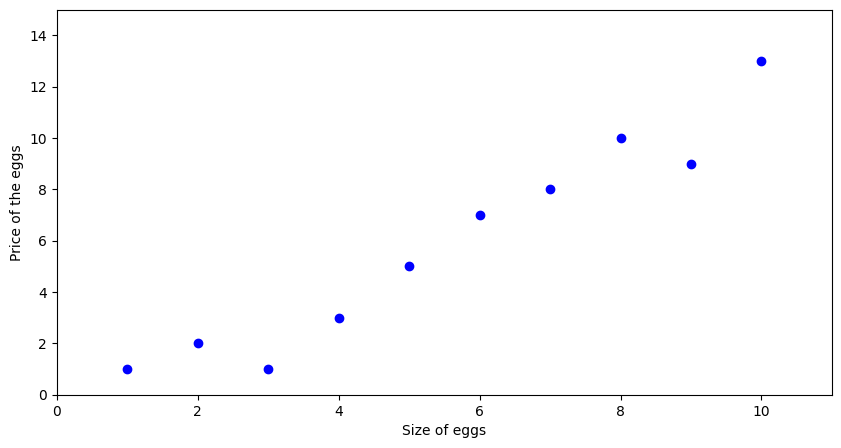

In [236]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 2, 1, 3, 5, 7, 8, 10, 9, 13]
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Sine Wave', color='blue')
plt.xlabel('Size of eggs')
plt.ylabel('Price of the eggs')
plt.xlim(0, 11)
plt.ylim(0, 15)

### Fit a basic line based on some assumption

For the given dataset, lets fit a linear curve:

\[
\begin{aligned}
y =  w * x + b
\end{aligned}
\]

where:
- w is the slope of the function (called as weight)
- b is the intercept (called as bias)

(0.0, 15.0)

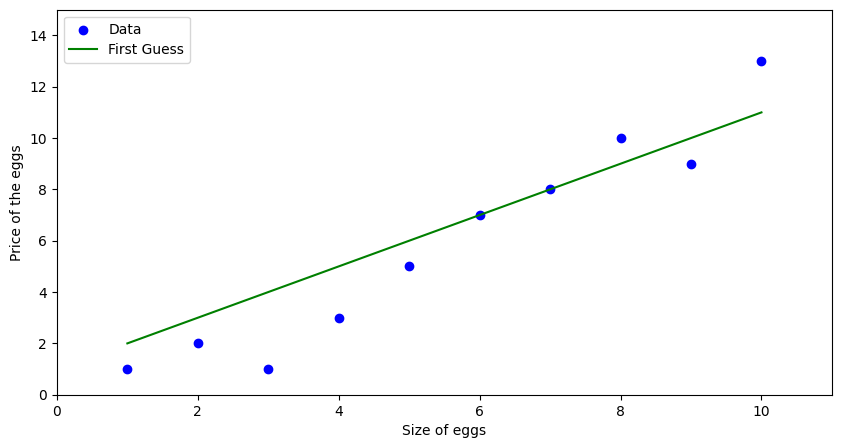

In [235]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 2, 1, 3, 5, 7, 8, 10, 9, 13])
f = lambda x: 1 * x + 1
z = f(x)
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, z, color='green', label='First Guess')
plt.xlabel('Size of eggs')
plt.ylabel('Price of the eggs')
plt.legend()
plt.xlim(0, 11)
plt.ylim(0, 15)

(0.0, 15.0)

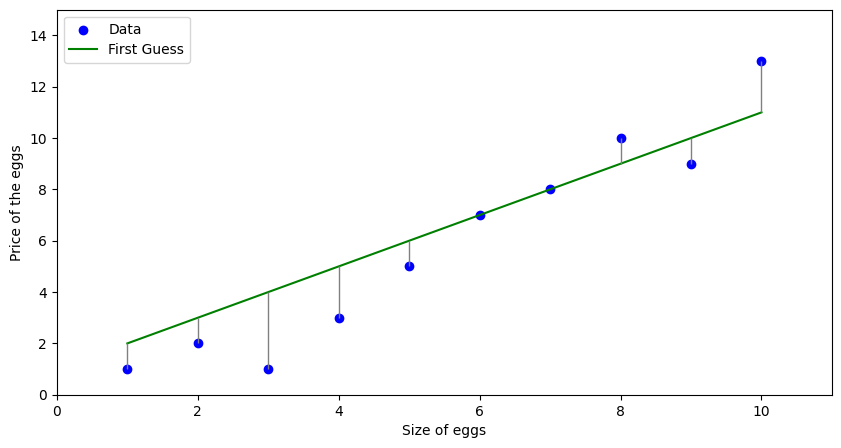

In [234]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 2, 1, 3, 5, 7, 8, 10, 9, 13])
f = lambda x: 1 * x + 1
z = f(x)
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, z, color='green', label='First Guess')
for xi, yi, zi in zip(x, y, z):
    # plt.scatter(xi, zi, color='green')
    plt.vlines([xi], ymin=yi, ymax=zi, color='gray', linestyle='-', linewidth=1)
plt.xlabel('Size of eggs')
plt.ylabel('Price of the eggs')
plt.legend()
plt.xlim(0, 11)
plt.ylim(0, 15)

In [92]:
L1 = lambda z, y: np.sum(np.abs(y-z))
L2 = lambda z, y: np.sum((y-z)**2)
MAE = lambda z, y: np.sum(np.abs(y - z)) / len(y)
MSE = lambda z, y: np.sum((y - z)**2) / len(y)
#Huber Loss ( combination of MAE and MASE)
Huber_L = lambda y, z, delta: np.where(np.abs(y - z) < delta, 0.5 * (y - z) ** 2, delta * (np.abs(y - z) - 0.5 * delta))

In [93]:
print("L1:", L1(z, y))
print("L2:", L2(z, y))
print("MAE:", MAE(z, y))
print("MSE:", MSE(z, y))

L1: 12
L2: 22
MAE: 1.2
MSE: 2.2


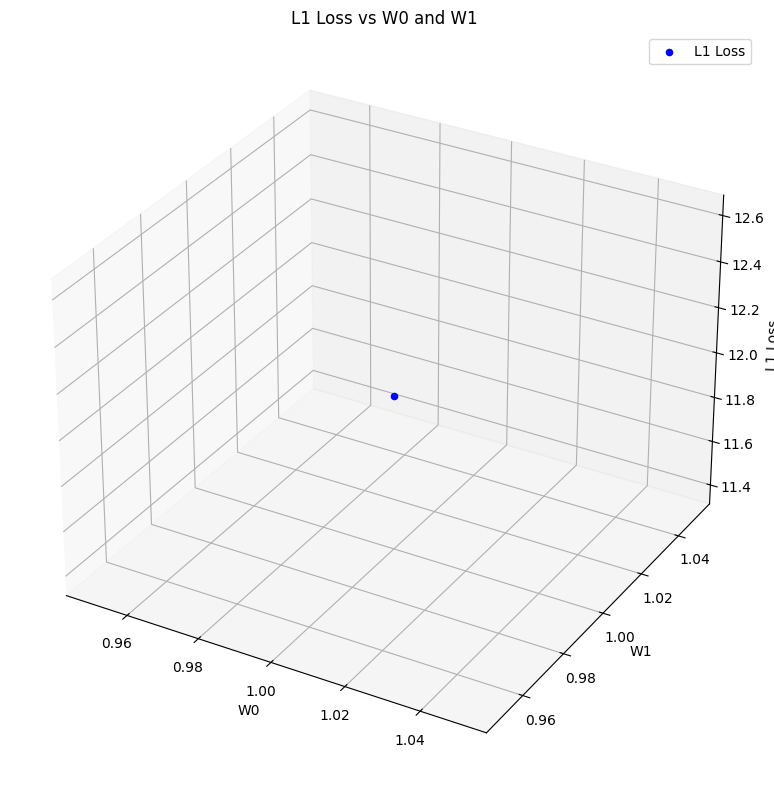

In [94]:
L1_list =[]
W0_list = []
W1_list = []

L1_list.append(L1(z, y))
W0_list.append(1)
W1_list.append(1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(W0_list, W1_list, L1_list, color='blue', label='L1 Loss')
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('L1 Loss')
ax.set_title('L1 Loss vs W0 and W1')
ax.legend()
plt.tight_layout()
plt.show()


### Gradient Descent Update Rules

Given a simple linear regression model:

\[
\hat{y}_i = w_1 x_i + w_0
\]

The weights are updated using gradient descent as follows:

\[
\begin{aligned}
w_0 &\leftarrow w_0 - \alpha \cdot \frac{2}{N} \sum_{i=1}^{N} \left( w_1 x_i + w_0 - y_i \right) \\
w_1 &\leftarrow w_1 - \alpha \cdot \frac{2}{N} \sum_{i=1}^{N} x_i \cdot \left( w_1 x_i + w_0 - y_i \right)
\end{aligned}
\]

Where:
- \( \alpha \) is the learning rate  
- \( N \) is the number of samples  
- \( y_i \) is the true label  
- \( \hat{y}_i = w_1 x_i + w_0 \) is the predicted value


![alt text](tiduxiajiang-1.png "Title")

### Weight Update Function for Linear Regression

The function below performs one step of gradient descent to update the weights \( w_0 \) (bias) and \( w_1 \) (slope) for a simple linear regression model:

```python
def update_weights(w0, w1, learning_rate=0.01):
    w0 -= learning_rate * (2/len(x) * np.sum([w1*x + w0 - y for x, y in zip(x, y)]))
    w1 -= learning_rate * (2/len(x) * np.sum([2*x * (w1*x + w0 - y) for x, y in zip(x, y)]))
    return w0, w1



### Loss here is based on the mean squared error

Given a simple linear regression model:

\[
\begin{aligned}
mse =  \frac{1}{N} \sum_{i=1}^{N} \left( y_{pred} - y_{real} \right)^2
\end{aligned}
\]

In [ ]:
w0=0
w1=0
def update_weights(w0, w1, learning_rate=0.01):
    w0 -= learning_rate * (2/len(x)*np.sum([w1*x+w0-y for x, y in zip(x, y)]))
    w1 -= learning_rate * (2/len(x)*np.sum([2*x*(w1*x+w0-y) for x, y in zip(x, y)]))
    return w0, w1


### Loss here is based on the absolute error (L1 loss)

Given a simple linear regression model:

\[
\begin{aligned}
L1 =   \sum_{i=1}^{N} \left( |y_{pred} - y_{real}| \right)
\end{aligned}
\]

The L1 loss function is defined as:


\begin{aligned}
L = \sum_{i=1}^n \left| y_i - (w_1 x_i + w_0) \right|
\end{aligned}


The subgradient of the absolute value function is:

\begin{aligned}
\frac{\partial}{\partial z} |z| = 
\begin{cases}
+1 & \text{if } z > 0 \\
-1 & \text{if } z < 0 \\
[-1, 1] & \text{if } z = 0
\end{cases}
\end{aligned}

where 
\begin{aligned} 
( z = y_i - (w_1 x_i + w_0) )
\end{aligned}.

Using this, the gradients for parameters \( w_0 \) and \( w_1 \) are:

\begin{aligned}
\frac{\partial L}{\partial w_0} = \frac{1}{n} \sum_{i=1}^n \text{sign}\big( (w_1 x_i + w_0) - y_i \big)
\end{aligned}

\begin{aligned}
\frac{\partial L}{\partial w_1} = \frac{1}{n} \sum_{i=1}^n x_i \cdot \text{sign}\big( (w_1 x_i + w_0) - y_i \big)
\end{aligned}

Then, the gradient descent update rules become:

\begin{aligned}
w_0 \leftarrow w_0 - \eta \frac{\partial L}{\partial w_0}
\end{aligned}

\begin{aligned}
w_1 \leftarrow w_1 - \eta \frac{\partial L}{\partial w_1}
\end{aligned}

where \(\eta\) is the learning rate.


In [148]:
def update_weights_l1(w0, w1, learning_rate=0.01):
    preds = w1 * x + w0
    errors = preds - y
    signs = np.sign(errors)
    grad_w0 = np.sum(signs) 
    grad_w1 = np.sum(signs * x) 
    w0 -= learning_rate * grad_w0
    w1 -= learning_rate * grad_w1

    return w0, w1


  6%|▌         | 6/100 [00:00<00:00, 185.56it/s]

Epoch 1, w0: 0.1000, w1: 0.5500, L1 Loss: 29.2500
Epoch 2, w0: 0.1800, w1: 1.0400, L1 Loss: 10.0800
Epoch 3, w0: 0.1600, w1: 1.1100, L1 Loss: 9.5500
Epoch 4, w0: 0.1400, w1: 1.1800, L1 Loss: 10.2600
Epoch 5, w0: 0.0800, w1: 0.9900, L1 Loss: 10.2500
Epoch 6, w0: 0.0800, w1: 1.2400, L1 Loss: 11.0400
Stopping early after 3 iterations with no decrease in loss


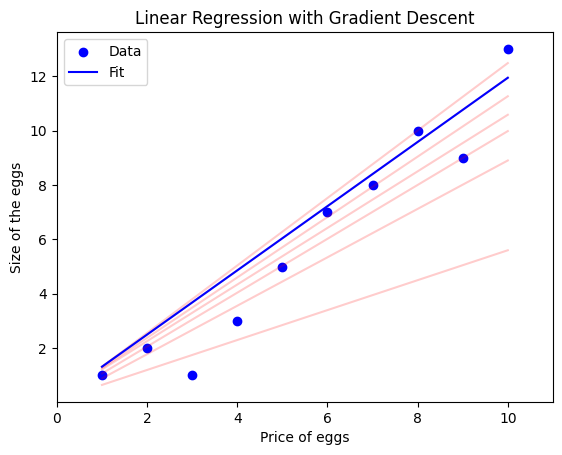

In [227]:
w0=0
w1=0
epoch = 100
mse = []
iterations = np.arange(epoch)
L1_list =[]
W0_list = []
W1_list = []
n = 0 
from tqdm import tqdm
for i in tqdm(range(epoch)):
    w0, w1 = update_weights_l1(w0, w1, learning_rate=0.01)
    W0_list.append(w0)
    W1_list.append(w1)
    plt.plot(x, [w0 + w1 * xi for xi in x], color='red', alpha=0.2)
    a = w0 + w1 * np.array(x)
    b = np.array(y)
    L1loss = np.sum(np.abs(b - a))
    L1_list.append(L1loss)
    ##Stopping Condition
    if n == 0:
        f_w0 = w0
        f_w1 = w1
    if i == 0:
        L1loss_prev = L1loss
    else:
        if L1loss_prev > L1loss:
            L1loss_prev = L1loss
        else:
            L1loss_prev = L1loss
            n += 1
    if n > 2:
        print("Stopping early after 3 iterations with no decrease in loss")
        break
    print(f'Epoch {i+1}, w0: {w0:.4f}, w1: {w1:.4f}, L1 Loss: {L1loss:.4f}')

z = f_w0 + f_w1 * x
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, z, label='Fit', color='blue')
plt.title('Linear Regression with Gradient Descent')
plt.xlim(0, 11)
plt.xlabel('Price of eggs')
plt.ylabel('Size of the eggs')
plt.legend()
# plt.ylim(-100, 15)

/var/folders/8p/dgslxnm15hn4k2p1pv_qsp500000gn/T/ipykernel_1468/1024385223.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(W0, W1, L1, cmap='viridis', label='L1 movement')


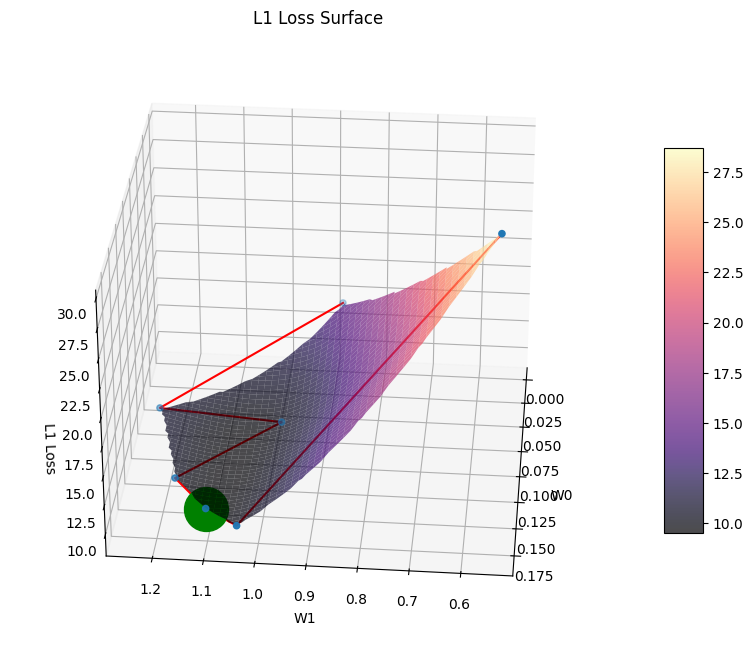

In [187]:
from scipy.interpolate import griddata
W0 = np.array(W0_list)
W1 = np.array(W1_list)
L1 = np.array(L1_list)
min_idx = np.argmin(L1)
min_w0 = W0[min_idx]
min_w1 = W1[min_idx]
min_l1 = L1[min_idx]

# Create a grid over the domain
grid_w0, grid_w1 = np.meshgrid(
    np.linspace(W0.min(), W0.max(), 100),
    np.linspace(W1.min(), W1.max(), 100)
)

# Interpolate L1 values on the grid
grid_l1 = griddata((W0, W1), L1, (grid_w0, grid_w1), method='cubic')

# Plot the surface
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(grid_w0, grid_w1, grid_l1, cmap='magma', edgecolor='none', alpha=0.7)
ax.scatter(W0, W1, L1, cmap='viridis', label='L1 movement')
ax.plot(W0, W1, L1, color='red', label='L1 movement')
ax.scatter(min_w0, min_w1, min_l1, color='green', s=1000, label='Min L1')
ax.view_init(210, 175)
ax.invert_zaxis()
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('L1 Loss')
ax.set_title('L1 Loss Surface')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()

  4%|▍         | 44/1000 [00:00<00:03, 254.59it/s]

Epoch 1, w0: 0.1180, w1: 1.7100, MSE Loss: 15.2928
Epoch 2, w0: 0.0455, w1: 0.8026, MSE Loss: 5.3025
Epoch 3, w0: 0.0743, w1: 1.2863, MSE Loss: 2.5297
Epoch 4, w0: 0.0494, w1: 1.0306, MSE Loss: 1.7160
Epoch 5, w0: 0.0530, w1: 1.1678, MSE Loss: 1.4980
Epoch 6, w0: 0.0415, w1: 1.0962, MSE Loss: 1.4259
Epoch 7, w0: 0.0381, w1: 1.1357, MSE Loss: 1.4069
Epoch 8, w0: 0.0304, w1: 1.1161, MSE Loss: 1.3966
Epoch 9, w0: 0.0250, w1: 1.1278, MSE Loss: 1.3922
Epoch 10, w0: 0.0185, w1: 1.1229, MSE Loss: 1.3876
Epoch 11, w0: 0.0126, w1: 1.1269, MSE Loss: 1.3840
Epoch 12, w0: 0.0064, w1: 1.1261, MSE Loss: 1.3802
Epoch 13, w0: 0.0004, w1: 1.1278, MSE Loss: 1.3766
Epoch 14, w0: -0.0057, w1: 1.1282, MSE Loss: 1.3730
Epoch 15, w0: -0.0117, w1: 1.1293, MSE Loss: 1.3694
Epoch 16, w0: -0.0177, w1: 1.1301, MSE Loss: 1.3658
Epoch 17, w0: -0.0236, w1: 1.1310, MSE Loss: 1.3623
Epoch 18, w0: -0.0296, w1: 1.1318, MSE Loss: 1.3588
Epoch 19, w0: -0.0355, w1: 1.1326, MSE Loss: 1.3554
Epoch 20, w0: -0.0414, w1: 1.1335

 45%|████▌     | 452/1000 [00:00<00:00, 1827.89it/s]

Epoch 280, w0: -0.9580, w1: 1.2642, MSE Loss: 0.9982
Epoch 281, w0: -0.9599, w1: 1.2645, MSE Loss: 0.9979
Epoch 282, w0: -0.9618, w1: 1.2648, MSE Loss: 0.9975
Epoch 283, w0: -0.9637, w1: 1.2650, MSE Loss: 0.9972
Epoch 284, w0: -0.9656, w1: 1.2653, MSE Loss: 0.9968
Epoch 285, w0: -0.9674, w1: 1.2656, MSE Loss: 0.9965
Epoch 286, w0: -0.9693, w1: 1.2658, MSE Loss: 0.9961
Epoch 287, w0: -0.9711, w1: 1.2661, MSE Loss: 0.9958
Epoch 288, w0: -0.9730, w1: 1.2664, MSE Loss: 0.9954
Epoch 289, w0: -0.9748, w1: 1.2666, MSE Loss: 0.9951
Epoch 290, w0: -0.9767, w1: 1.2669, MSE Loss: 0.9948
Epoch 291, w0: -0.9785, w1: 1.2671, MSE Loss: 0.9944
Epoch 292, w0: -0.9803, w1: 1.2674, MSE Loss: 0.9941
Epoch 293, w0: -0.9821, w1: 1.2677, MSE Loss: 0.9938
Epoch 294, w0: -0.9839, w1: 1.2679, MSE Loss: 0.9935
Epoch 295, w0: -0.9857, w1: 1.2682, MSE Loss: 0.9931
Epoch 296, w0: -0.9875, w1: 1.2684, MSE Loss: 0.9928
Epoch 297, w0: -0.9893, w1: 1.2687, MSE Loss: 0.9925
Epoch 298, w0: -0.9910, w1: 1.2689, MSE Loss: 

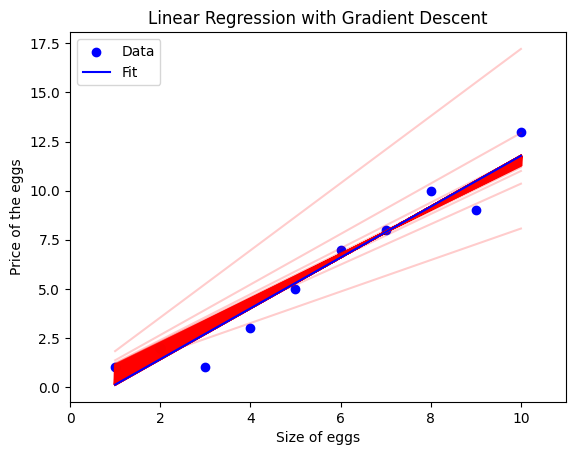

In [233]:
w0=0
w1=0
epoch = 1000
mse = []
iterations = np.arange(epoch)
W0_list = []
W1_list = []
n = 0
lr = 0.01
from tqdm import tqdm
for i in tqdm(range(epoch)):
    w0, w1 = update_weights(w0, w1, learning_rate=lr)
    W0_list.append(w0)
    W1_list.append(w1)
    plt.plot(x, [w0 + w1 * xi for xi in x], color='red', alpha=0.2)
    a = w0 + w1 * np.array(x)
    b = np.array(y)
    mean_squared_error = np.mean((a - b) ** 2)
    mse.append(mean_squared_error)
    ##Stopping Condition
    if n == 0:
        f_w0_1 = w0
        f_w1_1 = w1
    if i == 0:
        mse_prev = mean_squared_error
    else:
        if np.round(mse_prev, 4) > np.round(mean_squared_error, 4):
        # if mse_prev > mean_squared_error:
            # print(f"Mean Squared Error decreased from {mse_prev:.4f} to {mean_squared_error:.4f}")
            mse_prev = mean_squared_error
        elif np.round(mse_prev, 4) < np.round(mean_squared_error, 4):
            mse_prev = mean_squared_error
            n += 1
        elif np.round(mse_prev,4) == np.round(mean_squared_error,4):
            mse_prev = mean_squared_error
            n += 1
    if n > 2:
        print("Stopping early after 3 iterations with no decrease in loss")
        break
    print(f'Epoch {i+1}, w0: {w0:.4f}, w1: {w1:.4f}, MSE Loss: {mean_squared_error:.4f}')

z = f_w0_1 + f_w1_1 * x
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, z, label='Fit', color='blue')
plt.title('Linear Regression with Gradient Descent')
plt.xlim(0, 11)
plt.xlabel('Size of eggs')
plt.ylabel('Price of the eggs')
plt.legend()

/var/folders/8p/dgslxnm15hn4k2p1pv_qsp500000gn/T/ipykernel_1468/3443767394.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(W0, W1, MSE_L, cmap='viridis', label='L1 movement')


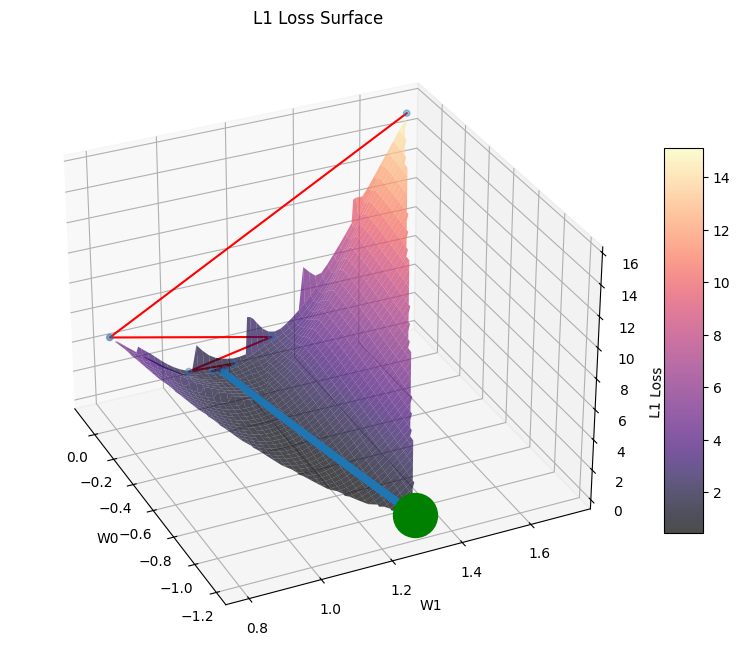

In [211]:
from scipy.interpolate import griddata
W0 = np.array(W0_list)
W1 = np.array(W1_list)
MSE_L = np.array(mse)
min_idx = np.argmin(MSE_L)
min_w0 = W0[min_idx]
min_w1 = W1[min_idx]
min_l1 = MSE_L[min_idx]

# Create a grid over the domain
grid_w0, grid_w1 = np.meshgrid(
    np.linspace(W0.min(), W0.max(), 100),
    np.linspace(W1.min(), W1.max(), 100)
)

# Interpolate L1 values on the grid
grid_l1 = griddata((W0, W1), MSE_L, (grid_w0, grid_w1), method='cubic')

# Plot the surface
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(grid_w0, grid_w1, grid_l1, cmap='magma', edgecolor='none', alpha=0.7)
ax.scatter(W0, W1, MSE_L, cmap='viridis', label='L1 movement')
ax.plot(W0, W1, MSE_L, color='red', label='L1 movement')
ax.scatter(min_w0, min_w1, min_l1, color='green', s=1000, label='Min L1')
ax.view_init(210, 25)
ax.invert_zaxis()
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('L1 Loss')
ax.set_title('L1 Loss Surface')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()

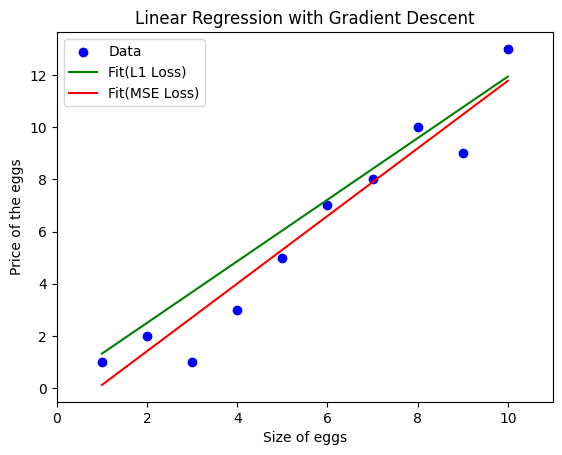

In [232]:
z = f_w0 + f_w1 * x
z_1 = f_w0_1 + f_w1_1 * x
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, z, label='Fit(L1 Loss)', color='green')
plt.plot(x, z_1, label='Fit(MSE Loss)', color='red')
plt.title('Linear Regression with Gradient Descent')
plt.xlim(0, 11)
plt.xlabel('Size of eggs')
plt.ylabel('Price of the eggs')
plt.legend()

In [218]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.reshape((-1, 1)), y)



LinearRegression()

In [221]:
X = np.array(x).reshape((-1, 1))
model = LinearRegression().fit(X, y)

In [222]:
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.938259287516873


In [224]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: -1.3999999999999977
slope: [1.32727273]


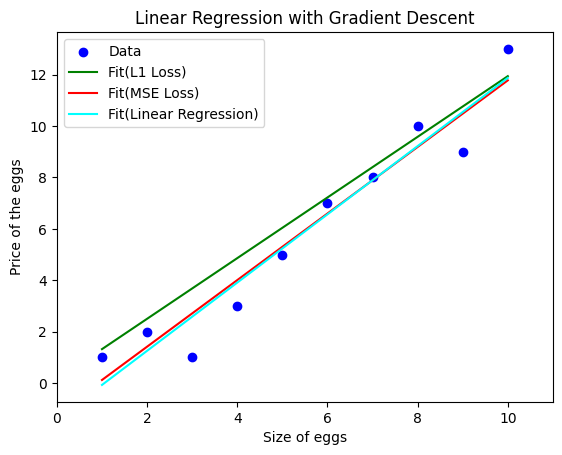

In [231]:
z = f_w0 + f_w1 * x
z_1 = f_w0_1 + f_w1_1 * x
z_n = model.intercept_ + model.coef_ * x
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, z, label='Fit(L1 Loss)', color='green')
plt.plot(x, z_1, label='Fit(MSE Loss)', color='red')
plt.plot(x, z_n, label='Fit(Linear Regression)', color='cyan')
plt.title('Linear Regression with Gradient Descent')
plt.xlim(0, 11)
plt.xlabel('Size of eggs')
plt.ylabel('Price of the eggs')
plt.legend()

# What if my chickens laid these
![alt text](golden-eggs-willy-wonka-and-the-chocolate-factory.gif "What if")

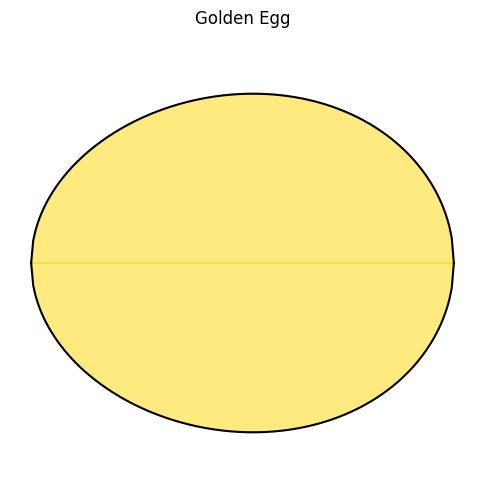

In [261]:
def plot_egg_shape(ax, L, B, w, D, title="Egg Shape"):
    x = np.linspace(-L/2, L/2, 200)
    y = B/2 * np.sqrt(1 - (2*x/L)**2) * (1 + w * (x/L))

    ax.plot(x, y, 'k')
    ax.plot(x, -y, 'k')
    ax.fill(x, y, color='gold', alpha=0.5)
    ax.fill(x, -y, color='gold', alpha=0.5)
    ax.axis('equal')
    ax.axis('off')
    ax.set_title(title)

fig, ax = plt.subplots(figsize=(6, 6))

L_hen = 1.0 
B_hen = 0.8
w_hen = 0.1 
D_hen = 0.6

plot_egg_shape(ax, L_hen, B_hen, w_hen, D_hen, title="Golden Egg")
plt.show()


In [246]:
x_new = np.linspace(9, 12, 4).reshape((-1, 1))
y_pred = model.predict(x_new)
print(f"predicted response:\n{y_pred}")

predicted response:
[10.54545455 11.87272727 13.2        14.52727273]


In [262]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  
y = 4 + 3 * X + np.random.randn(100, 1)

In [263]:
def sgd(X, y, learning_rate=0.1, epochs=1000, batch_size=1):
    m = len(X)  
    theta = np.random.randn(2, 1) 
    
    X_bias = np.c_[np.ones((m, 1)), X]

    cost_history = []  

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X_bias[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            gradients = 2 / batch_size * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta -= learning_rate * gradients

        predictions = X_bias.dot(theta)
        cost = np.mean((predictions - y) ** 2)
        cost_history.append(cost)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost}")

    return theta, cost_history

In [264]:
def sgd(X, y, learning_rate=0.1, epochs=1000, batch_size=1):
    m = len(X)  
    theta = np.random.randn(2, 1) 
    
    X_bias = np.c_[np.ones((m, 1)), X]

    cost_history = []  

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X_bias[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            gradients = 2 / batch_size * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta -= learning_rate * gradients

        predictions = X_bias.dot(theta)
        cost = np.mean((predictions - y) ** 2)
        cost_history.append(cost)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost}")

    return theta, cost_history

Epoch 0, Cost: 1.5818216868569395
Epoch 100, Cost: 1.5664692700155742
Epoch 200, Cost: 1.444542239117314
Epoch 300, Cost: 1.7037674963102662
Epoch 400, Cost: 0.9101999515899215
Epoch 500, Cost: 0.8184497904316664
Epoch 600, Cost: 0.8352333304446237
Epoch 700, Cost: 0.8542729530055074
Epoch 800, Cost: 1.0508310318687641
Epoch 900, Cost: 0.8261971232182219


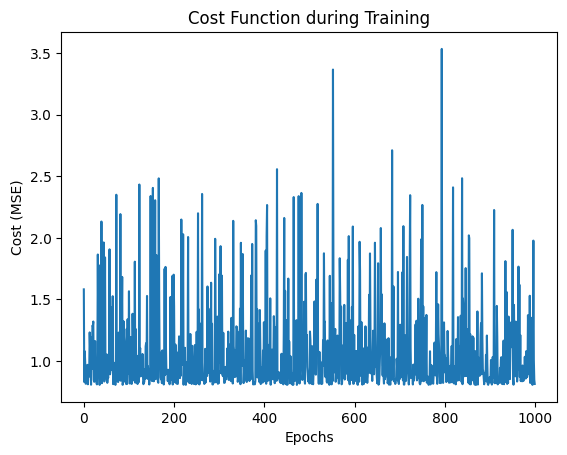

In [266]:
theta_final, cost_history = sgd(X, y, learning_rate=0.1, epochs=1000, batch_size=1)
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function during Training')
plt.show()

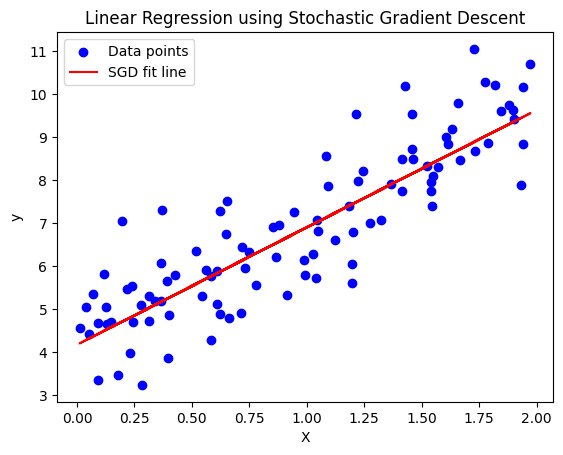

In [267]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, np.c_[np.ones((X.shape[0], 1)), X].dot(theta_final), color='red', label='SGD fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using Stochastic Gradient Descent')
plt.legend()
plt.show()